## Analisis de datos para oscilador trocional

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import statsmodels.api as sm
import sympy as sp
from scipy.signal import savgol_filter

### Calibración del rotor

In [2]:
# Lectura de datos
oscillator = pd.read_csv("Oscillator Analysis.csv", sep=';')

In [3]:
# Creamos una función para la extracción de datos
def data_extraction(data, colum_name, leng):
    if leng != 0:
        data_res = data[colum_name].iloc[:leng]
    else:
        data_res = data[colum_name].iloc[:leng]
    
    # Cambio a un arreglo de numpy
    data_array  = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in data_res])
    return data_array

In [4]:
# Datos obtenidos para el desplazamiento en radianes y el voltaje pico a pico para
names = ['Desplazamiento', 'Error des', 'Voltaje ', 'Error voltaje']

inf = []
for i in range(len(names)):
    data_array = data_extraction(oscillator, names[i], 10)
    inf.append(data_array)
    
dis_y = inf[0]
error_disy = inf[1]
voltage_x = inf[2]
error_vx = inf[3]


In [5]:
# Definimos una función que realice las regresiones lineales pertinentes
def regression(x_data, y_data):
    # Regresión lineal
    x_data = sm.add_constant(x_data)
    model = sm.OLS(y_data, x_data)
    reg = model.fit()
    
    # Valores de ajuste
    m = reg.params[1]
    b = reg.params[0]
    m_error = reg.bse[1]
    b_error = reg.bse[0]
    
    # Dado que dis_x retorna una tupla, nos quedamos con los datos que necesitamos
    x_data = np.array([x_data[i][1] for i in range(len(x_data))])
    y_pred = m * x_data + b 
    
    # Residuales
    residuals = reg.resid
    
    # Lista de elemetos obtenidos en la regresión
    result = [x_data, y_pred, m, b, m_error, b_error, residuals]
    
    return result

In [6]:
# Extraemos los datos obtenidos para la ecuaciuón del ajuste
res = regression(voltage_x, dis_y)
voltage_x = res[0]
y_pred  = res[1]
m = res[2]
b = res[3]
m_error = res[4]
b_error = res[5]
residuals = res[6]

symbol = '\u00B1'
eq0 = f'y = {m:.2f}x {symbol} {m_error:.3f} \n{b:.2f} {symbol} {b_error:.2f}'


In [7]:
# Ahora, vamos a crear una función que grafique las regresiones
def graph(x_data, y_data, y_pred, residuals, error_x, error_y, eq, vert, hori, space1, 
          space2, resy_name, res_title, y_name, x_name, title, x, y, name):
    
    plt.figure(figsize=(vert, hori))

    plt.subplot2grid((space1, 1), (0, 0), rowspan=1)
    plt.scatter(x_data, residuals, color='black')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.errorbar(x_data, residuals, xerr=error_x, yerr=error_y, fmt='o', capsize=5, color='black')
    plt.title(res_title, loc='center', fontfamily='Times New Roman', fontsize=16)
    plt.ylabel(resy_name, fontfamily='Times New Roman', fontsize=13)
    plt.grid()

    plt.subplot2grid((space2,1), (1,0), rowspan=2)
    plt.scatter(x_data, y_data, color='black', label='Datos')
    plt.plot(x_data, y_pred, linestyle='--', color='black', label='Ajuste')
    plt.errorbar(x_data, y_data, xerr=error_x, yerr=error_y, fmt='o', capsize=5, color='black')
    plt.xlabel(x_name, fontfamily='Times New Roman', fontsize=14)
    plt.ylabel(y_name, fontfamily='Times New Roman', fontsize=14)
    plt.title(title, loc='center', fontfamily='Times New Roman', fontsize=18)
    plt.text(x, y, eq, ha='center', fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
    plt.grid()
    plt.legend()

    plt.savefig(name)
    plt.show()
    

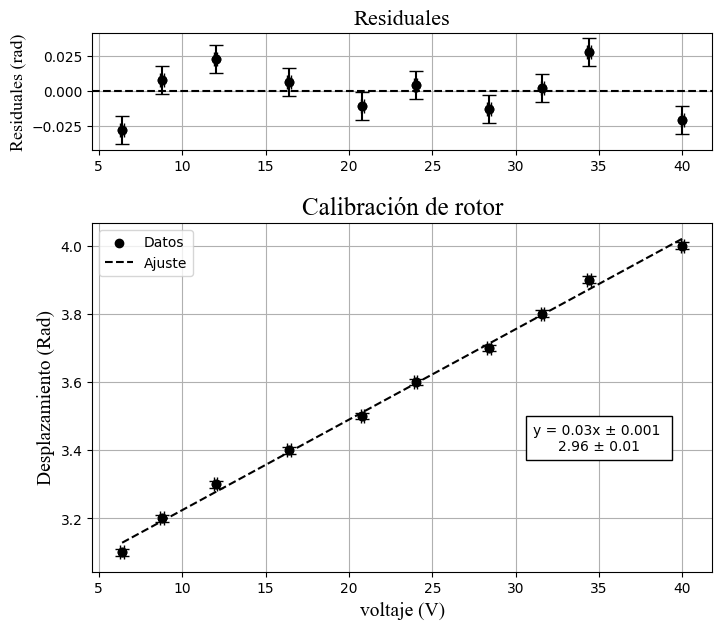

In [8]:
# Gráfica de la regresión
graph(voltage_x, dis_y, y_pred, residuals, error_vx, error_disy, eq0, 8, 7, 4, 3, 'Residuales (rad)', 'Residuales', 
      'Desplazamiento (Rad)', 'voltaje (V)', 'Calibración de rotor', 35, 3.4, 'Calibración de rotor')

### Aplicación de torque mecánico

In [10]:
# Datoa tomados para la toma realizada con una orientación 
names_1 = ['masa 1', 'equlibrio 1', 'Error 1']
rotor_radio = 0.01265

inf1 = []
for i in range(len(names_1)):
    data_array1 = data_extraction(oscillator, names_1[i], 7)
    inf1.append(data_array1)
    
mass_1x = np.array([inf1[0][i]/1000 for i in range(len(inf1[0]))])
# Usamos ecuación de torque para encontrar el troque apartir de la masa
torque_1x = mass_1x * 9.8 * rotor_radio
equilibrium_1y = inf1[1]
error_eq1y = inf1[2] 

# Datos tomados para otra orientación inversa
names_2 = ['masa 2', 'equlibrio 2', 'Error 2']

inf2 = []
for i in range(len(names_2)):
    data_array2 = data_extraction(oscillator, names_2[i], 6)
    inf2.append(data_array2)
    
mass_2x = np.array([inf2[0][i]/1000 for i in range(len(inf2[0]))])
torque_2x = mass_2x * 9.8 * rotor_radio
equilibrium_2y = inf2[1]
error_eq2y = inf2[2] 


In [11]:
# Regresión obtenida para cada masa usando la función 

result = regression(equilibrium_1y, torque_1x)
equilibrium_1y = result[0]
y1_pred = result[1]
m1 = result[2] 
b1 = result[3]
m1_error = result[4]
b1_error = result[5]
residuals1 = result[6]

eq1 = f'y = {m1:.4f}x {symbol} {m1_error:.3f} \n{b1:.2f} {symbol} {b1_error:.2f}'

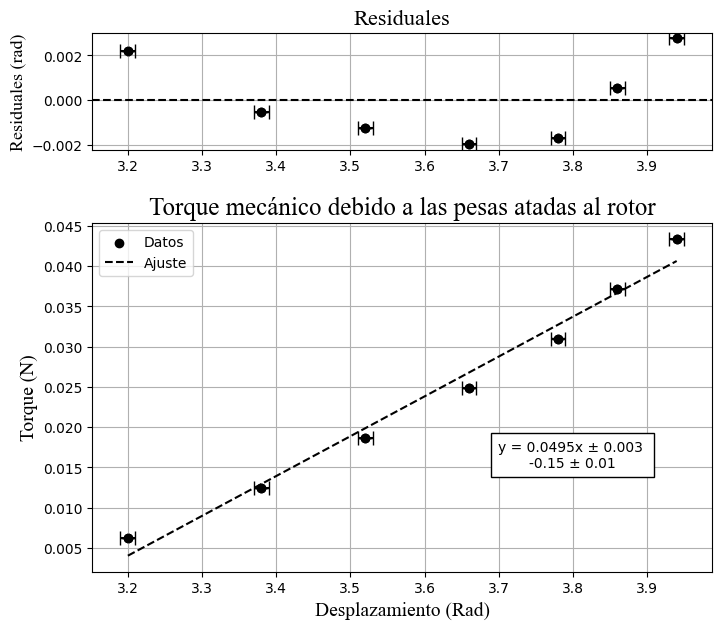

In [12]:
x1_error = np.array([5e-6, 5e-6, 5e-6, 5e-6, 5e-6, 5e-6, 5e-6])
graph(equilibrium_1y, torque_1x, y1_pred, residuals1, error_eq1y, x1_error, eq1, 8, 7, 4, 3, 'Residuales (rad)', 'Residuales', 
      'Torque (N)', 'Desplazamiento (Rad)', 'Torque mecánico debido a las pesas atadas al rotor', 3.8, 0.015, 'torque mecánico toma 1')

In [13]:
# Regresión para la serie de datos con la orientación inversa
result2 = regression(equilibrium_2y, torque_2x)
equilibrium_2y = result2[0]
y2_pred = result2[1]
m2 = result2[2]
b2 = result2[3]
m2_error = result2[4]
b2_error = result2[5]
residuals2 = result2[6]

eq2 = f'y = {m2:.4f}x {symbol} {m2_error:.3f} \n{b2:.2f} {symbol} {b2_error:.2f}'


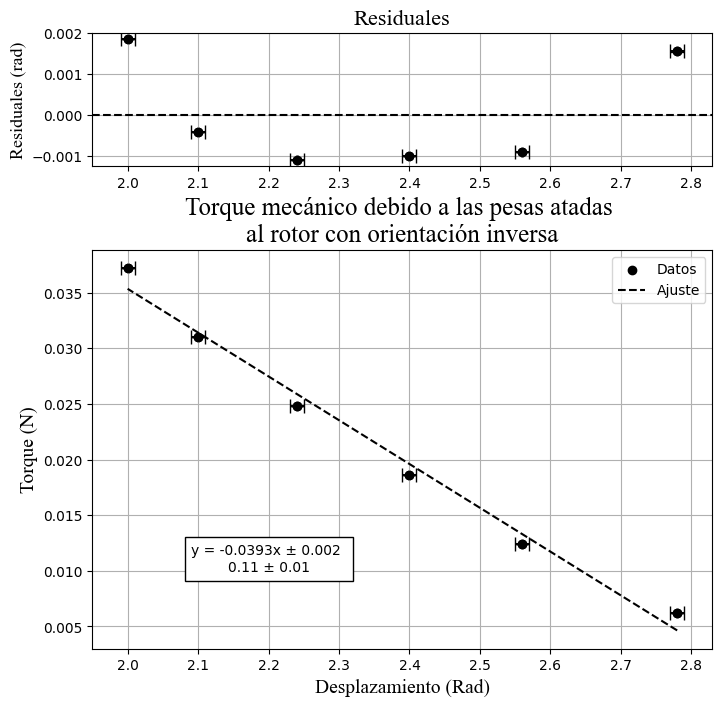

In [14]:
x2_error = np.array([5e-6, 5e-6, 5e-6, 5e-6, 5e-6, 5e-6])
graph(equilibrium_2y, torque_2x, y2_pred, residuals2, error_eq2y, x2_error, eq2, 8, 8, 4, 3, 'Residuales (rad)', 'Residuales', 
      'Torque (N)', 'Desplazamiento (Rad)', 'Torque mecánico debido a las pesas atadas \nal rotor con orientación inversa', 2.2, 0.01, 'torque mecánico toma 2')

### Los valores de la pendiente corresponden a k obtenido de forma experimental

### Toma para el momento de inercia

In [15]:
# Extracción de datos para los tiempos tomados con respecto el numero de masas 
names_3 = ['Numero de masas', 'periodo (s)', 'error periodos']

inf3 = []
for i in range(len(names_3)):
    data_array3 = data_extraction(oscillator, names_3[i], 9)
    inf3.append(data_array3)
    
mass_num_x = inf3[0]
period_y = np.array([inf3[1][i] ** 2 for i in range(len(inf3[1]))])
error_py = inf3[2] 


In [16]:
# Regresión para los datos tomados con el cambio de masa
result3 = regression(mass_num_x, period_y)
mass_num_x = result3[0]
y3_pred = result3[1]
m3 = result3[2] 
b3 = result3[3]
m3_error = result3[4]
b3_error = result3[5]
residuals3 = result3[6]

eq3 = f'y = {m3:.2f}x {symbol} {m3_error:.3f} \n{b3:.2f} {symbol} {b3_error:.2f}'


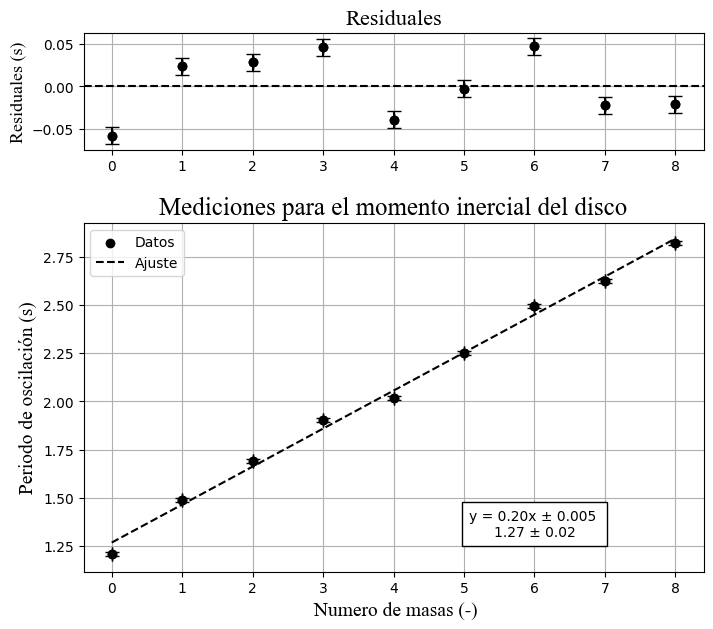

In [17]:
# Realización de la gráfica
x3_error = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
graph(mass_num_x, period_y, y3_pred, residuals3, x3_error, error_py, eq3, 8, 7, 4, 3, 'Residuales (s)', 'Residuales', 
      'Periodo de oscilación (s)', ' Numero de masas (-)', 'Mediciones para el momento inercial del disco', 6, 1.3, 'Momento inercial')

### Cálculo de momento de inercia

In [18]:
# inicialmente se determina la inercia de una masa pequeña
R_2 = 0.0927
R_1 = 0.0435
M = 0.2120

delta_I = (M * (R_2 - R_1) ** 2)/2

# Dada las ecuaciones dadas en la guia, se tiene que la pendiente equivale a (4*pi**2*delta_I*N)/k, donde N representa
# el número de masas

k = (4 * np.pi ** 2 * delta_I)/m3

#  Ahora, con ayuda de la intersección encontramos el momento inercial inicial

I = (b3 * k)/(4 * np.pi**2)

# Propagaciones
# para delta_I
def delta_delta_I(M, R_1, R_2, delta_M, delta_R1, delta_R2):
    d_delta_M = (R_2 - R_1)/2
    d_delta_R2 = (M * (2 * R_2 - 2 * R_1))/2
    d_delta_R1 = (M * (2 * R_1 -2 * R_2))
    return np.sqrt((d_delta_M * delta_M) ** 2 + (d_delta_R2 * delta_R2) ** 2 + (d_delta_R1 * delta_R1) ** 2)

d_delta_I = delta_delta_I(M, R_1, R_2, 1e-4, 5e-5, 5e-5)

# Para k
def d_k(delta_I, m, d_delta_I, delta_m):
    d_I = (4 * np.pi ** 2) * m
    d_m = (delta_I * 4 * np.pi ** 2)/(m ** 2)
    return np.sqrt((d_I * d_delta_I) ** 2 + (d_m * delta_m) ** 2)

delta_k = d_k(delta_I, m3, d_delta_I, m3_error)

# Para I
def d_I(k, b, delta_k, delta_b):
    d_k = b/(4 * np.pi ** 2)
    d_b = k/(4 * np.pi ** 2)
    return np.sqrt((d_k * delta_k) ** 2 + (d_b * delta_b) ** 2)

del_I = d_I(k, b3, delta_k, b3_error)

print(delta_I, d_delta_I)
print(k, delta_k)
print(I, del_I)


0.0002565878400000001 2.722409879500147e-06
0.05143711188077212 0.0013647264727143296
0.001652214906540285 5.451502407006238e-05


### Mediciones para torque magnético

In [19]:
# Extracción de datos con polaridad normal
names_4 = ['Corriente 1', 'desplazamiento 1 ', 'error corriente 1', 'error des 1']

inf4 = []
for i in range(len(names_4)):
    data_array4 = data_extraction(oscillator, names_4[i], 8)
    inf4.append(data_array4)
    
current_1x = inf4[0]
dis_1y = inf4[1]
error_c1x = inf4[2] 
error_d1y = inf4[3] 

# Extracción de datos para la segunda toma con polaridad inversa
names_5 = ['Corriente 2', 'desplazamiento 2 ', 'error corriente 2', 'error des 2']

inf5 = []
for i in range(len(names_5)):
    data_array5 = data_extraction(oscillator, names_5[i], 8)
    inf5.append(data_array5)
    
current_2x = inf5[0]
dis_2y = inf5[1]
error_c2x = inf5[2] 
error_d2y = inf5[3]

In [20]:
# Regresión para los datos tomados con el cambio de masa
result4 = regression(current_1x, dis_1y)
current_1x= result4[0]
y4_pred = result4[1]
m4 = result4[2] 
b4 = result4[3]
m4_error = result4[4]
b4_error = result4[5]
residuals4 = result4[6]

eq4 = f'y = {m4:.2f}x {symbol} {m4_error:.2f} \n{b4:.2f} {symbol} {b4_error:.2f}'

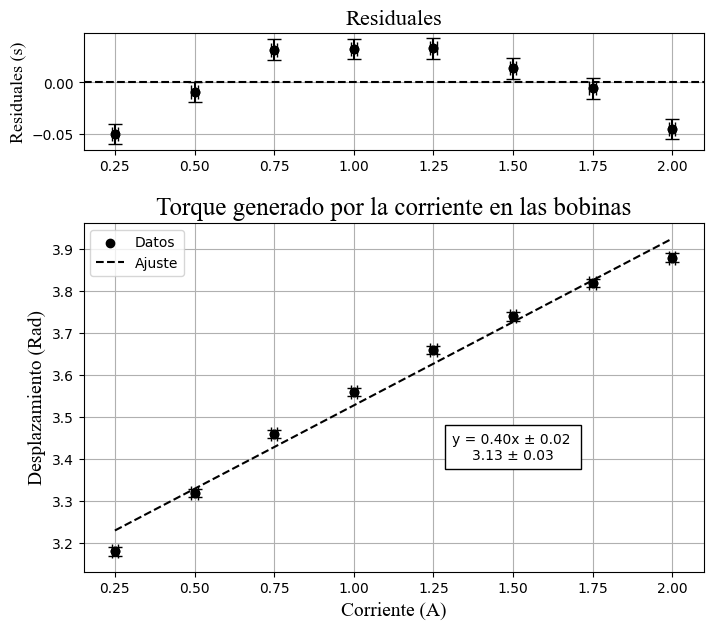

In [21]:
# Gráficamos los datos
graph(current_1x, dis_1y, y4_pred, residuals4, error_c1x, error_d1y, eq4, 8, 7, 4, 3, 'Residuales (s)', 'Residuales', 
      'Desplazamiento (Rad)', 'Corriente (A)', 'Torque generado por la corriente en las bobinas', 1.50, 3.4, 'Torque magnético toma 1')

### Valor de mu obtenido 7.15 con mu*k/k Para los dos casos 

In [22]:
# Cálculo de mu con uso de theta = (mu * K / k) * i(t)
# En este caso usaremo el valor de k y K tórico 
k_t = 0.058 #N * m/rad
K  = 3.22e-3 # T/A

mu = (m4 * k_t)/K

# Propagación de error para mu
def d_mu(k, K, delta_m):
    return (k/K) * delta_m

delta_mu = d_mu(k_t, K, m4_error)

print(mu, delta_mu)

7.153504880212961 0.4041376524014226


In [23]:
# Regresión para los datos con polaridad inversa
result5 = regression(current_2x, dis_2y)
current_2x= result5[0]
y5_pred = result5[1]
m5 = result5[2] 
b5 = result5[3]
m5_error = result5[4]
b5_error = result5[5]
residuals5 = result5[6]

eq5 = f'y = {m5:.2f}x {symbol} {m5_error:.2f} \n{b5:.2f} {symbol} {b5_error:.2f}'

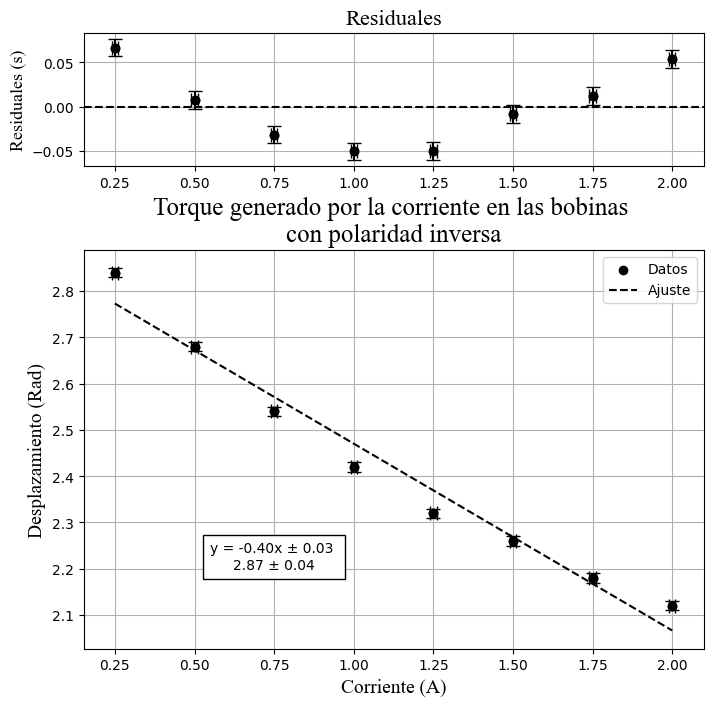

In [24]:
# Gráficamos los datos
graph(current_2x, dis_2y, y5_pred, residuals5, error_c2x, error_d2y, eq5, 8, 8, 4, 3, 'Residuales (s)', 'Residuales', 
      'Desplazamiento (Rad)', 'Corriente (A)', 'Torque generado por la corriente en las bobinas \ncon polaridad inversa', 0.75, 2.2, 'Torque magnético toma 2')

### Tomas de oscilación forzada con señal sinusoidal

In [25]:
# Lectura de datos
# Primera toma de datos
names_5 = ['Frecuencia (mHz) 1', 'error F1', 'Amplitud mV 1', 'error A1']
inf5 = []
for i in range(len(names_5)):
    data_array5 = data_extraction(oscillator, names_5[i], 34)
    inf5.append(data_array5)
    
frequency_1x = np.array([inf5[0][i]/1000 for i in range(len(inf5[0]))])
amplitud_1y = np.array([inf5[2][i]/1000 for i in range(len(inf5[2]))])
error_f1 = np.array([inf5[1][i]/1000 for i in range(len(inf5[1]))])
error_a1 = np.array([inf5[3][i]/1000 for i in range(len(inf5[3]))])

# Datos obtenidos para la toma con un mayor amortiguamiento
names_6 = ['Frecuencia (mHz) 2', 'error F2', 'Amplitud mV 2', 'error A2']
inf6 = []
for i in range(len(names_6)):
    data_array6 = data_extraction(oscillator, names_6[i], 31)
    inf6.append(data_array6)
    
frequency_2x = np.array([inf5[0][i]/1000 for i in range(len(inf6[0]))])
amplitud_2y = np.array([inf5[2][i]/1000 for i in range(len(inf6[2]))])
error_f2 = np.array([inf5[1][i]/1000 for i in range(len(inf6[1]))]) 
error_a2 = np.array([inf5[3][i]/1000 for i in range(len(inf6[3]))]) 


In [81]:
# Se realiza la regresión sobre los valores obtenidos para cada toma.
# Se realiza una regresión tipo lorentziana debido a la naturaleza del fenomeno.
def lorentzian(x, A, B, C):
    return A * (B**2 / ((x - C)**2 + B**2)) 

# Aplicamos la regresión

initial_guess = [1, 1]
result_1, cov_1 = curve_fit(lorentzian, frequency_1x, amplitud_1y)
A_1, B_1, C_1 = result_1

error_A1 = np.sqrt(cov_1[0, 0])
error_B1 = np.sqrt(cov_1[1, 1])
error_C1 = np.sqrt(cov_1[2, 2])

eq6 = f'y = {A_1:.2f} {symbol} {error_A1:.3f} / (x^2 {B_1:.2f} \n {symbol} {error_B1:.3f}) + {C_1:.2f} {symbol} {error_C1:.3f}'

adjusted_curve1 = lorentzian(frequency_1x, A_1, B_1, C_1)
residuals6 =  amplitud_1y - adjusted_curve1

print(A_1)
print(B_1)

0.9739789852139329
-0.038900970668505785


In [82]:
# Ahora, se realiza la segunda gráfica para la segunda toma
result_2, cov_2 = curve_fit(lorentzian, frequency_2x, amplitud_2y)
A_2, B_2, C_2 = result_2

error_A2 = np.sqrt(cov_2[0, 0])
error_B2 = np.sqrt(cov_2[1, 1])
error_C2 = np.sqrt(cov_2[2, 2])

eq7 = f'y = {A_2:.2f} {symbol} {error_A2:.3f} / (x^2 {B_2:.2f} \n {symbol} {error_B2:.3f}) + {C_2:.2f} {symbol} {error_C2:.3f}'

adjusted_curve2 = lorentzian(frequency_2x, A_2, B_2, C_1)
residuals7 =  amplitud_2y - adjusted_curve2

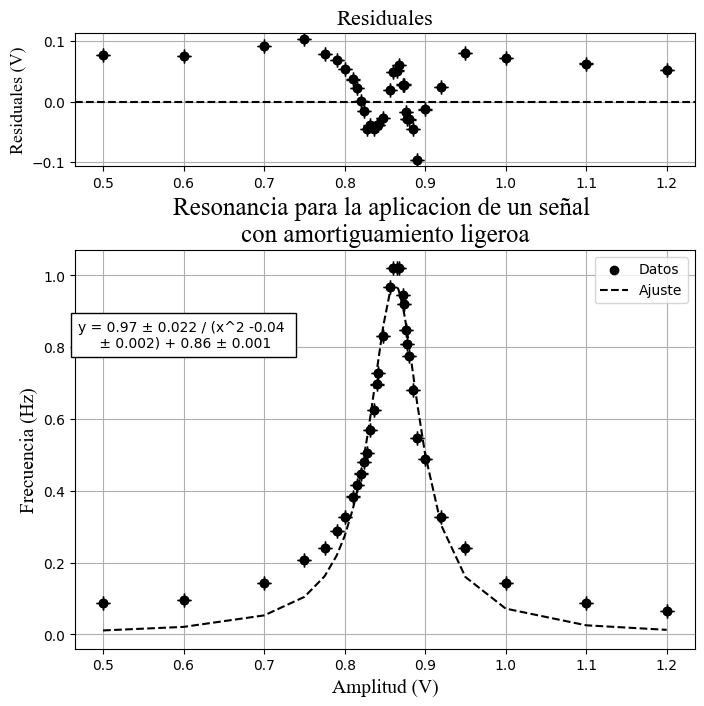

In [83]:
# Se realizan las gráficas con las respectivas regresiones.
graph(frequency_1x, amplitud_1y, adjusted_curve1, residuals6, error_f1, error_a1, eq6, 8, 8, 4, 3, 'Residuales (V)', 'Residuales', 
      'Frecuencia (Hz)', 'Amplitud (V)', 'Resonancia para la aplicacion de un señal \ncon amortiguamiento ligeroa', 0.6, 0.8, 'Resonancia toma 1')


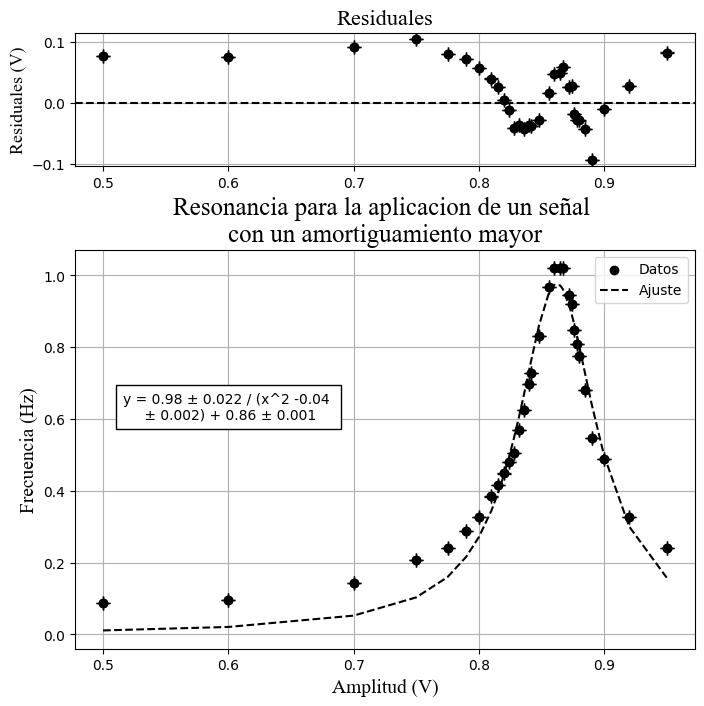

In [84]:
graph(frequency_2x, amplitud_2y, adjusted_curve2, residuals7, error_f2, error_a2, eq7, 8, 8, 4, 3, 'Residuales (V)', 'Residuales', 
      'Frecuencia (Hz)', 'Amplitud (V)', 'Resonancia para la aplicacion de un señal \ncon un amortiguamiento mayor', 0.6, 0.6, 'Resonancia toma 2')

### Tomas de amortiguamiento

In [119]:
# Extracción de datos para la toma de amortiguamiento
# Datos de poco amortiguamiento
names_7 = ['tiempo (s) 1', 'error t1', 'amplitudes (V) 11', 'error a1']
inf7 = []
for i in range(len(names_7)):
    data_array7 = data_extraction(oscillator, names_7[i], 31)
    inf7.append(data_array7)
    
time_1x = inf7[0]
ampli_1y = inf7[2]
error_t1 = inf7[1] 
error_a11 = inf7[3] 

# Datos de amortiguamineto parcial
names_8 = ['tiempo (s) 2', 'error t2', 'amplitudes (V) 22', 'error a2']
inf8 = []
for i in range(len(names_8)):
    data_array8 = data_extraction(oscillator, names_8[i], 31)
    inf8.append(data_array8)
    
time_2x = inf8[0]
ampli_2y = inf8[2]
error_t2 = inf8[1] 
error_a22 = inf8[3] 

# Datos de amortiguamineto casi completo
names_9 = ['tiempo (s) 3', 'error t3', 'amplitudes (V) 3', 'error a3']
inf9 = []
for i in range(len(names_9)):
    data_array9 = data_extraction(oscillator, names_9[i], 31)
    inf9.append(data_array9)
    
time_3x = inf9[0]
ampli_3y = inf9[2]
error_t3 = inf9[1] 
error_a3 = inf9[3] 

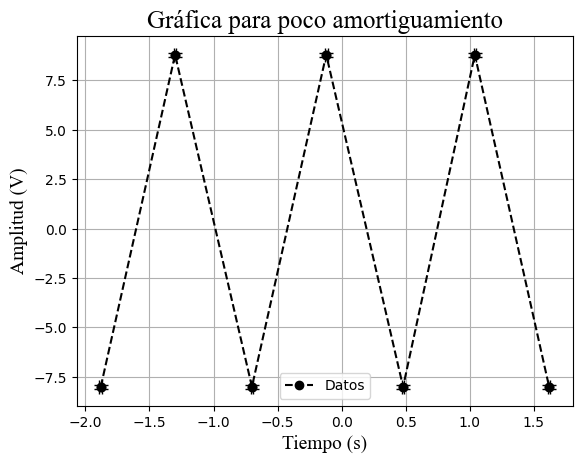

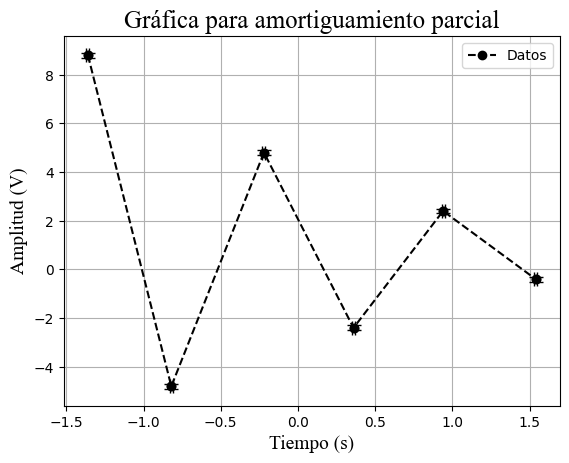

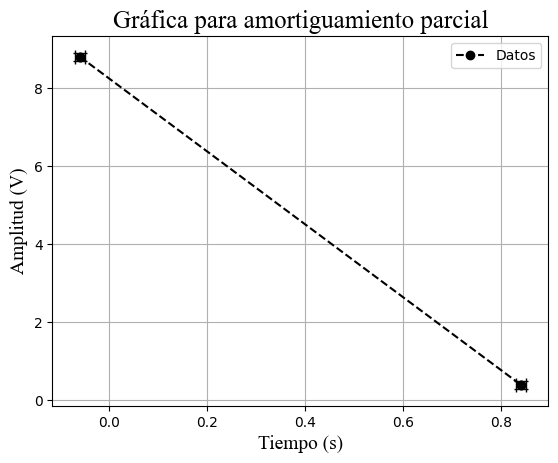

In [120]:
# Gráficamos cada toma de datos

# Primera toma de datos con poco amortiguamiento
plt.plot(time_1x, ampli_1y, color='black', label='Datos', linestyle='--', marker='o')
plt.errorbar(time_1x, ampli_1y, xerr=error_t1, yerr=error_a11, fmt='o', capsize=5, color='black')
plt.xlabel('Tiempo (s)', fontfamily='Times New Roman', fontsize=14)
plt.ylabel('Amplitud (V)', fontfamily='Times New Roman', fontsize=14)
plt.title('Gráfica para poco amortiguamiento', loc='center', fontfamily='Times New Roman', fontsize=18)
plt.grid()
plt.legend()

plt.savefig('amortiguamiento toma 1')
plt.show()

# Segunda toma de datos con amortiguamiento parcial
plt.plot(time_2x, ampli_2y, color='black', label='Datos', linestyle='--', marker ='o')
plt.errorbar(time_2x, ampli_2y, xerr=error_t2, yerr=error_a22, fmt='o', capsize=5, color='black')
plt.xlabel('Tiempo (s)', fontfamily='Times New Roman', fontsize=14)
plt.ylabel('Amplitud (V)', fontfamily='Times New Roman', fontsize=14)
plt.title('Gráfica para amortiguamiento parcial', loc='center', fontfamily='Times New Roman', fontsize=18)
plt.grid()
plt.legend()

plt.savefig('Amortiguamiento toma 2')
plt.show()

# Tercera toma de datos con amortiguamiento casi total
plt.plot(time_3x, ampli_3y, color='black', label='Datos', linestyle='--', marker ='o')
plt.errorbar(time_3x, ampli_3y, xerr=error_t3, yerr=error_a3, fmt='o', capsize=5, color='black')
plt.xlabel('Tiempo (s)', fontfamily='Times New Roman', fontsize=14)
plt.ylabel('Amplitud (V)', fontfamily='Times New Roman', fontsize=14)
plt.title('Gráfica para amortiguamiento parcial', loc='center', fontfamily='Times New Roman', fontsize=18)
plt.grid()
plt.legend()

plt.savefig('Amortiguamiento toma 3')
plt.show()


### Los puntos no se pudieron suavizar debido a la falta de datos, sin embargo, se observa el efecto.